# Project on emergency calls dataset 

This is a data analysis and data visualization project from a real dataset from Kaggle. The data is on Emergency - 911 Calls from Montgomery County, PA. 

In [1]:
# Some import for the project

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

The name of the downloaded data file from kaggle is 911.csv, let's import in pandas dataframe 'df'.

In [2]:
df = pd.read_csv('Emergency_Calls.csv')

The number of columns and entries in the dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Let's see the 2 first rows of the dataset.

In [4]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


How many unique townships and title are there in the data?

In [5]:
df['twp'].nunique(), df['title'].nunique()

(68, 110)

Let us see wich two township call the most and what is the call volume?

In [6]:
df['twp'].value_counts().head(2)

LOWER MERION    8443
ABINGTON        5977
Name: twp, dtype: int64

The top 5 townships(twp) for 911 calls

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many unique title codes are in the dataset and what are the top ten title codes? 

In [11]:
print('There are {} unique title codes in the dataset'.format(df['title'].nunique()))
print(df['title'].value_counts().head(10))

There are 110 unique title codes in the dataset
Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64


The title "Traffic: VEHICLE ACCIDENT", we can take "Traffic" as a Reason/or/Department and "VEHICLE ACCIDENT" as code. Either we can create one column with Reason or tow separate with reason and code. Such feature creating is very helpful in the data analysis.

Let's create two new columns "Reason" and "Code" in the data accordingly.

In [12]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])
df['Code']=df['title'].apply(lambda title : title.split(':')[1])

let 's see how the data looks like now (first two rows only), and identify the new columns in data?

In [13]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY


How many unique reasons are for the call?

In [15]:
df['Reason'].unique()


array(['EMS', 'Fire', 'Traffic'], dtype=object)

What is the most common Reason to call? We'll use countplot.

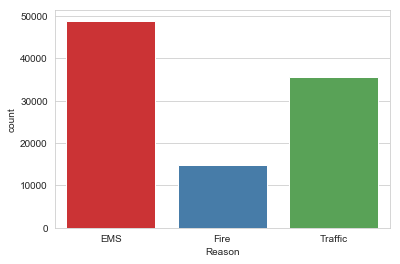

In [17]:
sns.countplot(x='Reason', data = df, palette='Set1')

Now that we have created two new columns from 'title', if we look at the 'timeStamp' column, it has year, month, day, hour etc which can be useful in many ways. The datatype is string for this column. Let's check again the type for any location e.g. at iloc[0]

In [18]:
df['timeStamp'].iloc[0], type(df['timeStamp'].iloc[0])

('2015-12-10 17:40:00', str)

Let's convert 'timeStamp' from string to DateTime objects.

We going to use pd.to_datetime to convert the column from strings DateTime objects.

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
5       2015-12-10 17:40:01
6       2015-12-10 17:40:01
7       2015-12-10 17:40:01
8       2015-12-10 17:40:01
9       2015-12-10 17:40:01
10      2015-12-10 17:40:01
11      2015-12-10 17:40:02
12      2015-12-10 17:40:02
13      2015-12-10 17:40:02
14      2015-12-10 17:40:02
15      2015-12-10 17:40:02
16      2015-12-10 17:46:01
17      2015-12-10 17:47:01
18      2015-12-10 17:47:01
19      2015-12-10 17:47:02
20      2015-12-10 17:47:02
21      2015-12-10 17:57:02
22      2015-12-10 18:02:01
23      2015-12-10 18:02:02
24      2015-12-10 18:02:02
25      2015-12-10 18:06:25
26      2015-12-10 18:06:25
27      2015-12-10 18:06:25
28      2015-12-10 18:06:26
29      2015-12-10 18:11:01
                ...        
99462   2016-08-24 09:41:00
99463   2016-08-24 09:42:00
99464   2016-08-24 09:51:06
99465   2016-08-24 09:56:13
99466   2016-08-24 1

Let's check the type of any data entry in 'timeStamp' column and extract month from the DateTime object.

In [22]:
time=df['timeStamp'].iloc[0]
type(time), time.month, time.year

(pandas._libs.tslibs.timestamps.Timestamp, 12, 2015)

Let's create four new columns 'year', 'hour', 'month', 'data' and 'day_of_week' to our dataframe, then display first two rows to confirm if we have the new columns in the dataset?

In [38]:
df['year'] = df['timeStamp'].apply(lambda time: time.year)
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['date'] = df['timeStamp'].apply(lambda time: time.date())
df['week_day'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,month,date,day_of_week,day_name,month_name,week_day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,2015-12-10,3,NaN,Dec,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,2015-12-10,3,NaN,Dec,3


In [39]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
         7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'} 

In [40]:
df['day_name'] = df['week_day'].map(day_map)
df['month_name'] = df['month'].map(month_map)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,month,date,day_of_week,day_name,month_name,week_day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,2015-12-10,3,Thu,Dec,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,2015-12-10,3,Thu,Dec,3


Let's see which month is busiest month?

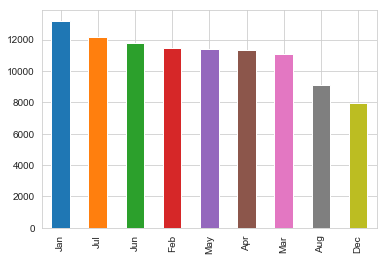

In [41]:
df['month_name'].value_counts().plot(kind='bar')

Or with countplot.

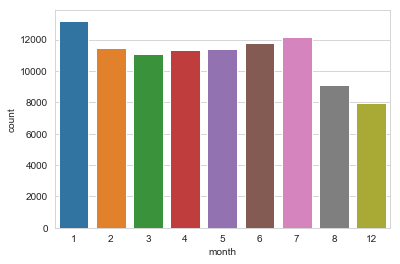

In [42]:
sns.countplot(x='month',data=df)

Let's create a countplot for the week_day column with the hue based on the Reason column. Relocate the legend outside of the plot please.

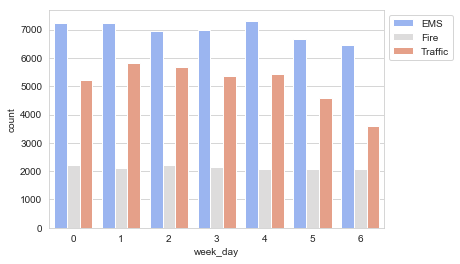

In [44]:
sns.countplot(x='week_day', data = df, hue= 'Reason', palette ='coolwarm')

# To relocate the legend
plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

Let's create also a countplot for month with reason as hue?

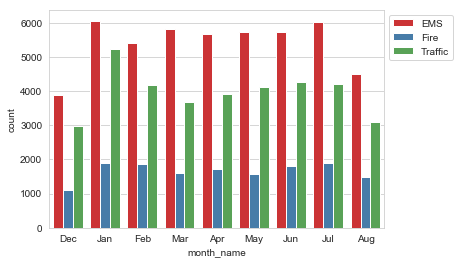

In [45]:
sns.countplot(x='month_name', data=df, hue= 'Reason', palette= 'Set1')

#relocate the legend
plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

In [47]:
df['month_name'].isnull().sum()

0

In [48]:
# It appears that there is no data entries from these months.
# Some months are missing. 9,10, and 11 are not there.

We can fill in the missing information using other ways like Line plot.

Let's group the data by month and agrregate using count()
. We'll use head() to display the data.


In [50]:
byMonth = df.groupby('month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,date,day_of_week,day_name,month_name,week_day
month,,,,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969


Let's create a simple plot using grouped data against month and use any column to plot along y

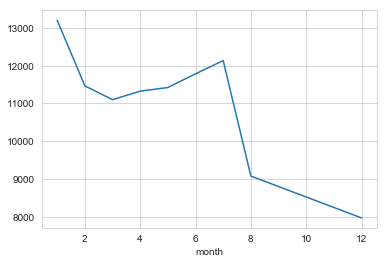

In [63]:
byMonth['timeStamp'].plot()


Let's use seaborn's lmplot() to create a linear fit on the number of calls per month. We may need to reset the index to a column so that we can use it in the lmplot.

In [53]:
data=byMonth.reset_index()
data.head()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Code,year,hour,date,day_of_week,day_name,month_name,week_day
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423


C:\Users\Stevy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


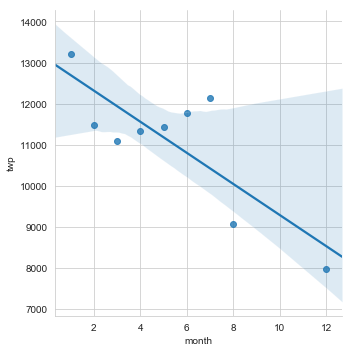

In [61]:
sns.lmplot(x='month',y ='twp', data=data)


We have a column 'date' in our data.

The emergency department needs to know the flux of calls per day for each reason mentioned in the dataset so that they can take necessary steps to improve the service. 

Let's see the variations in the calls flux per day for three reasons (Traffic, Fire, EMS) in the dataset. 

We need to group the data for each reason on date column and call the count().

In [66]:
n_calls_byDate_Traffic = df[df['Reason']=='Traffic'].groupby('date').count()
n_calls_byData_Fire = df[df['Reason']=='Fire'].groupby('date').count()
n_calls_byDate_EMS = df[df['Reason']=='EMS'].groupby('date').count()


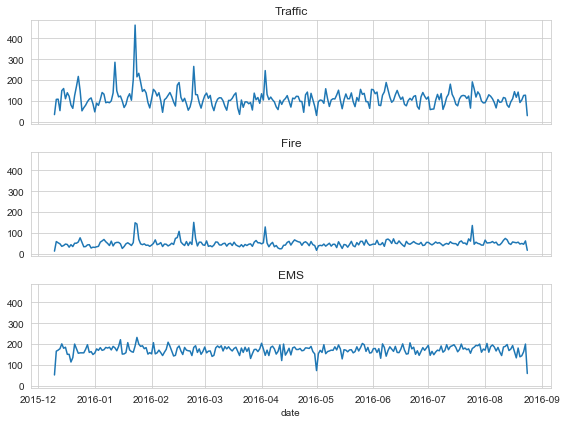

In [68]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(8, 6), sharex=True, sharey=True)

n_calls_byDate_Traffic['zip'].plot(ax=ax1)
ax1.set_title('Traffic')

n_calls_byData_Fire['zip'].plot(ax=ax2)
ax2.set_title('Fire')

n_calls_byDate_EMS['zip'].plot(ax=ax3)
ax3.set_title('EMS')

plt.tight_layout()

plt.show()


The emergency department wants to know the time of the day/night when they expect most calls. In this case Heatmaps and clustermap are really helpful. 

Let's reshape our data in a way that we get days along index and hours along columns. We can use groupby along with unstack() for this purpose. We can call aggregation method count() and take any column e.g. 'zip', 'Reason' etc in this process.

In [69]:
by_dayhr=df.groupby(by=['day_name', 'hour']).count()['Reason'].unstack()
by_dayhr.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Let's create a HeatMap using the dataframe that we have just created to see what time does the emergency crew gets maximum number of calls?

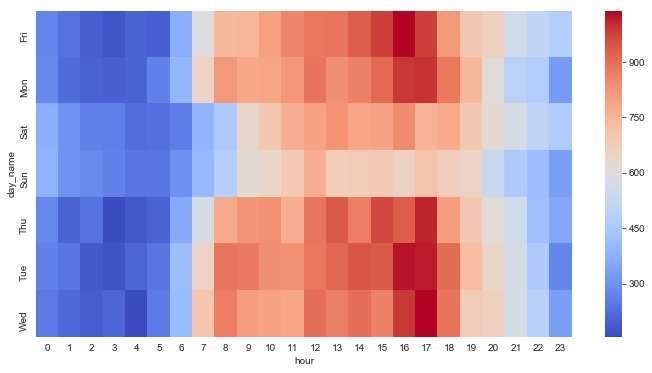

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(by_dayhr,cmap='coolwarm')

plt.show()

Working day after work are the busy hours, people left for home after long day of work and more calls are expected.

Night hours are mostly quite hours.

Saturday and Sunday has lower flux and the less number of calls are made in early morning.

Let's create a clustermap using our datafarme

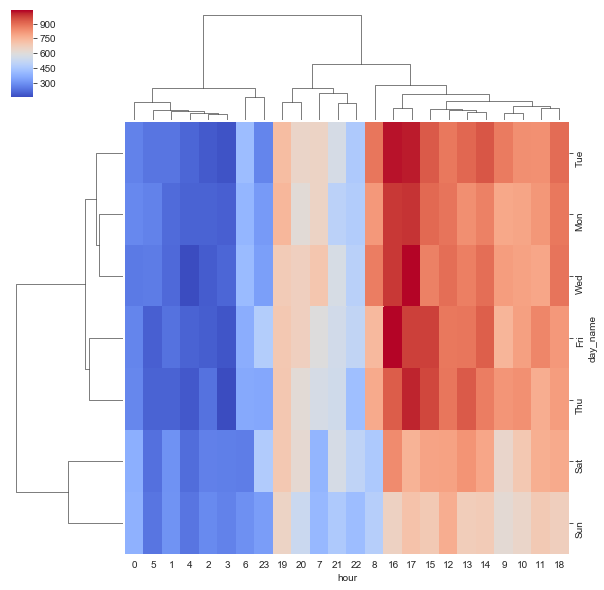

In [71]:
sns.clustermap(by_dayhr,cmap='coolwarm')



Let's create an other dataframe for months as columns and recreate heatmap and clustermap.

In [72]:
by_dayMonth = df.groupby(by=['day_name','month']).count()['Reason'].unstack()
by_dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day_name,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


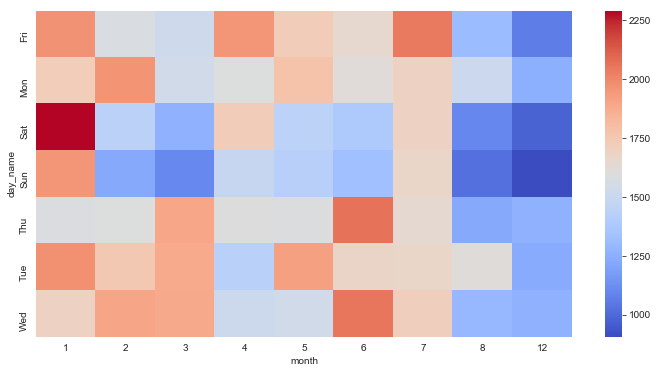

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(by_dayMonth, cmap='coolwarm')
plt.show()

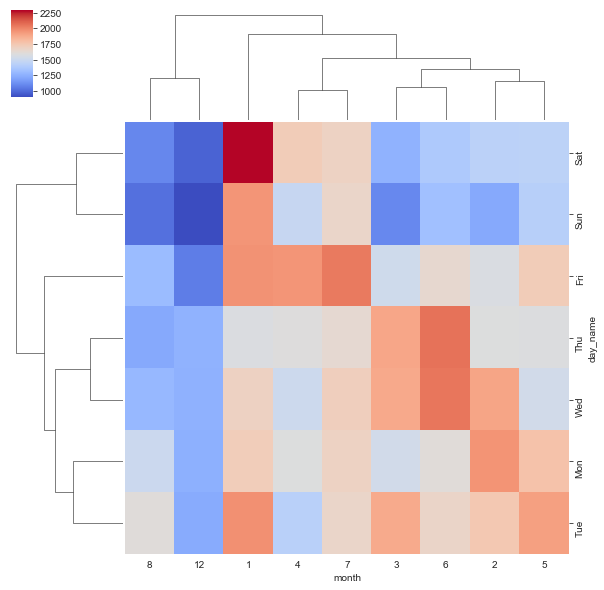

In [74]:
sns.clustermap(by_dayMonth,cmap='coolwarm')